# Lectura 3: Diferentes perspectivas de las métricas de desempeño y algoritmos de ensemble
# Aplicaciones de Minería de Datos II
# Septiembre, 2023


### Leyendo una matriz de confusión

<p>Existen otras métricas de desempeño que pueden ser utilizadas para medir la relevancia de un modelo, como la precisión, exhaustividad y F1-score.</p>
<p>La matriz de confusión muestra el desempeño de un algoritmo de aprendizaje. Es simplemente una matriz cuadrada que reporta el conteo de los <b>Verdaderos Positivos (TP o VP)</b>, <b>Verdaderos Negativos (TN o VN)</b>,<b>Falsos Positivos (FP)</b> y <b>Falsos Negativos (FN)</b> resultados de las predicciones de un clasificador, como se muestra en la siguiente Figura</p>

![alt text](1.png "Title")

In [1]:
#Dividir muestras en netrenamiento y prueba
# cross_val_score: realizar el proceso de validación cruzada (mejor modelo con los mejores datos)
from sklearn.model_selection import train_test_split, cross_val_score
#Estimador de estandarización por la media
from sklearn.preprocessing import StandardScaler
#MSV
from sklearn.svm import SVC
#Regresión Logística
from sklearn.linear_model import LogisticRegression
#Algoritmos de ensemble
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
#Árbol de Desición
from sklearn.tree import DecisionTreeClassifier
#Pipeline
from sklearn.pipeline import Pipeline
#Las clases tipo metrics presentan estrategias para la evaluación del desempeño de diferentes algoritmos
from sklearn.metrics import classification_report, confusion_matrix,precision_score, recall_score, f1_score, roc_curve, roc_auc_score
#Clasificador de vecinos más cercanos
from sklearn.neighbors import KNeighborsClassifier
#Vectorizador de tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy import interp
from cm import matriz_imprimir
from MayoriaDeVotos import MayoriaDeVotos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import operator

In [2]:
#Cargar el dataset
dataset = pd.read_csv('../datasets/CSDMC_API_Train.csv')
X = dataset['x']
y = dataset['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [3]:
dataset.head()

y                                                  x
0  1  LoadLibraryW HeapAlloc HeapAlloc HeapFree Heap...
1  1  RegOpenKeyExW LoadLibraryA GetProcAddress GetP...
2  1  HeapAlloc HeapFree HeapAlloc HeapAlloc HeapFre...
3  1  HeapAlloc HeapFree HeapAlloc HeapAlloc HeapFre...
4  1  HeapAlloc HeapFree HeapAlloc HeapAlloc HeapFre...

In [4]:
pipe_svc = Pipeline([('tfidf',TfidfVectorizer()), ('clf', SVC(random_state=1))])
#param_range = [0.0001, 0.001, 0.01]

In [5]:
pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[ 2 10]
 [ 0 66]]


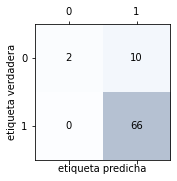

In [6]:
matriz_imprimir(confmat)

<p>De lo anterior se asume que dos ($2$) muestras fueron correctamente clasificadas como <i>benignware</i> (VN) y sesenta y seis ($66$) muestras como <i>malware</i> (verdaderos positivos). Aún así, el modelo clasificó incorrectamente once ($11$) muestras como <b>malware</b>.</p>

## Relación entre la precisión y el modelo de clasificación 

<p>El <b>error de predicción (ERR)</b> y la exactitud proveen información general de cuantas muestras fueron mal clasificadas. </p>

\begin{equation} 
 ERR = \frac{FP+FN}{FP+FN+TP+TN}
\end{equation}
\begin{equation} 
 ACC = \frac{TP+TN}{FP+FN+TP+TN}
\end{equation}

<p>El rango de verdaderos positivos (TPR) y radio de falsos positivos (FPR) son métricas de desempeño especificas para problemas de <b>clases no balanceadas</b>.</p>
\begin{equation} 
 FPR = \frac{FP}{N}=\frac{FP}{FP+TN}
\end{equation}
\begin{equation} 
 TPR = \frac{TP}{P}=\frac{TP}{FN+TP}
\end{equation}

<p>La precisión y exhaustividad son métricas de desempeño relacionadas a los rangos de verdaderos positivos y verdaderos negativos.</p>
\begin{equation} 
 PRE = \frac{TP}{TP+TF}
\end{equation}
\begin{equation} 
 REC = TPR =  \frac{TP}{P}=\frac{TP}{FN+TP}
\end{equation}

<p>La combinación entre la precisión y la exhaustividad es conocida como puntaje F1:</p>
\begin{equation} 
 F1 = 2\frac{PRE \times REC}{PRE + REC}
\end{equation}

In [8]:
print('Precisión: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('Exhaustividad: %.3f' % recall_score( y_true=y_test, y_pred=y_pred)) 
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

Precisión: 0.868
Exhaustividad: 1.000
F1: 0.930


### Bibliotecas de balanceo sintético

In [11]:
#%pip install imbalanced-learn

<p>Investigar el algoritmo de SMOTE (Synthetic Minority Oversampling Technique)</p>

In [63]:
from imblearn.over_sampling import SMOTE

#Transformar el dataset categórico a pesos nméricos
vec = TfidfVectorizer()
X_vec = vec.fit_transform(X.values)
print("Antes de balancear")
print("Muestras de benignware",len(dataset[dataset['y']==0]))
print("Muestras de malware",len(dataset[dataset['y']==1]))
#print(X_vec[0].toarray()[0])
X_resampled, y_resampled = SMOTE().fit_resample(X_vec, y)
print("Después de balancear")
print("Muestras de benignware",len([y1 for y1 in y_resampled.values if y1==0]))
print("Muestras de malware",len([y1 for y1 in y_resampled.values if y1==1]))
#Dividir la muestras balanceadas en entreamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.20, random_state=1)

Antes de balancear
Muestras de benignware 68
Muestras de malware 320
Después de balancear
Muestras de benignware 320
Muestras de malware 320


In [64]:
msv = SVC()
msv.fit(X_train,y_train)

SVC()

[[59  7]
 [ 3 59]]


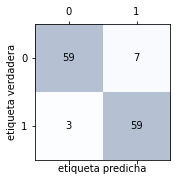

In [67]:
y_pred = msv.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)
matriz_imprimir(confmat)

In [68]:
print('Precisión: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('Exhaustividad: %.3f' % recall_score( y_true=y_test, y_pred=y_pred)) 
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

Precisión: 0.894
Exhaustividad: 0.952
F1: 0.922


<p>Investigación: Probar SMOTE + Grid Search con el algoritmo de árboles de desición</p>

<p>La <b>curva operativa del receptor (ROC)</b> es una herramienta gráfica para seleccionar modelos de clasificación basados en su desempeño con respecto a los rangos de falsos positivos (FP) y verdaderos positivos (VP), calculados cuando se manipula el umbral del clasificador.</p>

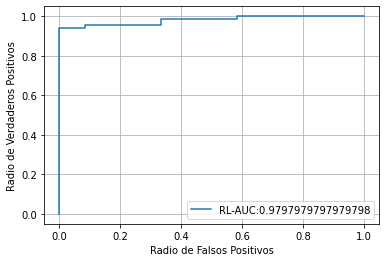

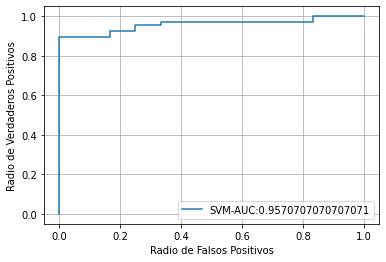

In [70]:
#Pipeline de TF-IDF + Regresión Logística
pipe_lr = Pipeline([('tfidf',TfidfVectorizer()),
('clf', LogisticRegression(penalty='l2',random_state=0,max_iter=1000,C=100.0))])
#Dividir el conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
#calcular la cantidad de clases únicas (malware y benignware)
n_classes = len(np.unique(y))
#Entrenar el estimador
y_score = pipe_lr.fit(X_train, y_train).decision_function(X_test)
#Calcular el radio de falsos positivos y verdaderos positivos
fpr, tpr, _ = roc_curve(y_test,  y_score)
#Calcular el área sobre la curva
auc_rl = roc_auc_score(y_test, y_score)

#Pipeline de TF-IDF + MSV
pipe_svc = Pipeline([('tfidf',TfidfVectorizer()), ('clf', SVC(random_state=1))])
#Dividir el conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
#Entrenar el estimador
y_score_svm = pipe_svc.fit(X_train, y_train).decision_function(X_test)
#Calcular el radio de falsos positivos y verdaderos positivos
fpr_svm, tpr_svm, _ = roc_curve(y_test,  y_score_svm)
#Calcular el área sobre la curva
auc_svm = roc_auc_score(y_test, y_score_svm)

#create ROC curve
plt.plot(fpr,tpr,label='RL-AUC:'+str(auc_rl))
plt.ylabel('Radio de Verdaderos Positivos')
plt.xlabel('Radio de Falsos Positivos')
plt.grid()
plt.legend(loc=4)
plt.show()

#create ROC curve
plt.plot(fpr_svm,tpr_svm,label='SVM-AUC:'+str(auc_svm))
plt.ylabel('Radio de Verdaderos Positivos')
plt.xlabel('Radio de Falsos Positivos')
plt.grid()
plt.legend(loc=4)
plt.show()

<p>Un clasificador perfecto tendría valores en la esquina superior derecha de la gráfica con un valor de verdaderos positivos de 1 y un falso positivo de 0. Basado en la curva ROC, se puede calcular la llamada <b>área bajo la curva</b> que caracteriza el desempeño del modelo de clasifiación.</p>

## Combinando  diferentes modelos para aprendizaje en conjunto

<p>Una forma de obtener un conjunto diverso de clasificadores es utilizar algoritmos diferentes, o utilizar el mismo para cada predictor, pero entrenarlos en diferentes subconjuntos aleatorios a partir del conjunto de entrenamiento. Cuando el muestreo se realiza con reemplazo, este método se denomina <i>bagging</i> (abreviatura de <i>bootstrap aggregating</i>). Cuando el muestreo se realiza sin reemplazo, se denomina <i>pasting</i>.</p>

<p>En otras palabras, tanto el <i>bagging</i> como el <i>pasting</i> permiten muestrear instancias de entrenamiento varias veces entre múltiples predictores, pero sólo el <i>bagging</i> permite muestrear instancias de entrenamiento varias veces para el mismo predictor. </p>

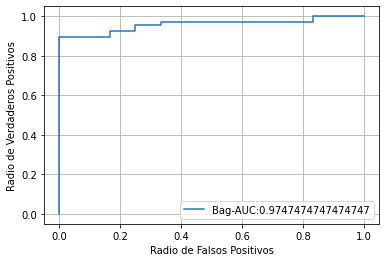

In [71]:
bag_clf = BaggingClassifier(SVC(C=10,random_state=1), n_estimators=100,max_samples=100, bootstrap=True, n_jobs=-1)
bag_clf_vec = Pipeline([('tfidf',TfidfVectorizer()), ('bag_clf', bag_clf)])
bag_clf_vec.fit(X_train, y_train)
y_pred = bag_clf_vec.predict(X_test)
y_score_bag = bag_clf_vec.fit(X_train, y_train).decision_function(X_test)
fpr_bag, tpr_bag, _ = roc_curve(y_test,  y_score_svm)
auc_bag = roc_auc_score(y_test, y_score_bag)

#create ROC curve
plt.plot(fpr_bag,tpr_bag,label='Bag-AUC:'+str(auc_bag))
plt.ylabel('Radio de Verdaderos Positivos')
plt.xlabel('Radio de Falsos Positivos')
plt.grid()
plt.legend(loc=4)
plt.show()

In [72]:
print('Precisión: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('Exhaustividad: %.3f' % recall_score( y_true=y_test, y_pred=y_pred)) 
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

Precisión: 0.917
Exhaustividad: 1.000
F1: 0.957


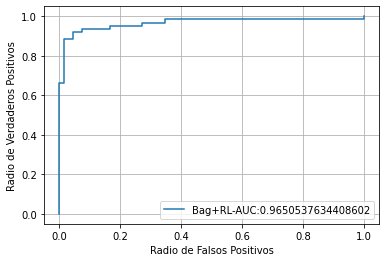

In [80]:
#Pruebas con el dataset balanceado
bag_rl = BaggingClassifier(LogisticRegression(penalty='l2',random_state=0,max_iter=1000,C=150.0), n_estimators=100,max_samples=100, bootstrap=True, n_jobs=-1)
X_resampled, y_resampled = SMOTE().fit_resample(X_vec, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.20, random_state=1)
y_score_bag = bag_rl.fit(X_train, y_train).decision_function(X_test)
y_pred = bag_rl.predict(X_test)
fpr_bag, tpr_bag, _ = roc_curve(y_test,  y_score_bag)
auc_bag = roc_auc_score(y_test, y_score_bag)

#create ROC curve
plt.plot(fpr_bag,tpr_bag,label='Bag+RL-AUC:'+str(auc_bag))
plt.ylabel('Radio de Verdaderos Positivos')
plt.xlabel('Radio de Falsos Positivos')
plt.grid()
plt.legend(loc=4)
plt.show()

In [81]:
print('Precisión: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('Exhaustividad: %.3f' % recall_score( y_true=y_test, y_pred=y_pred)) 
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

Precisión: 0.950
Exhaustividad: 0.919
F1: 0.934


<p>Una vez entrenados todos los estimadores, el conjunto puede hacer una predicción para una nueva instancia, simplemente agregando las predicciones de todos los ahora predictores. La función de agregación suele ser el modo estadístico (es decir, la predicción más frecuente, al igual que un clasificador de voto duro) para la clasificación, o la media para la regresión. Cada uno de los predictores.</p>


![alt text](2.png "Title")

<p>Un ejemplo es el algoritmo de Random Forest (RF), un conjunto de Árboles de Decisión, generalmente entrenado a través del método de <i>bagging</i> (o a veces de <i>pasting</i>), normalmente con el hiperparámetro <code>max_samples</code> establecido al tamaño del conjunto de entrenamiento. En lugar de construir un <code>BaggingClassifier</code> y pasarle una clase <code>DecisionTreeClassifier</code>, se puede utilizar la clase <code>RandomForestClassifier</code>, que es más conveniente y está optimizada para los Árboles de Decisión (de forma similar, existe una clase denominada <code>RandomForestRegressor</code> para tareas de regresión). El siguiente diagrama describe el concepto general de un clasificador en conjunto utilizando mayoría de votos.</p>

![alt text](3.png "Title")

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
pipe_rf = Pipeline([('tfidf',TfidfVectorizer()), ('clf', RandomForestClassifier(n_estimators=500,criterion='entropy'))])
pipe_rf.fit(X_train,y_train)
y_pred = pipe_rf.predict(X_test)

In [84]:
print('Precisión: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('Exhaustividad: %.3f' % recall_score( y_true=y_test, y_pred=y_pred)) 
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

Precisión: 1.000
Exhaustividad: 1.000
F1: 1.000
[[12  0]
 [ 0 66]]


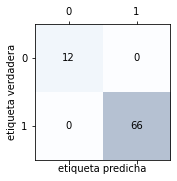

In [85]:
matriz_imprimir(confmat)

## Construcción de un algoritmo de mayoría de votos

<p>La idea es balancear  la debilidad y fortaleza cada clasificador individual  y escribir una mayoría de votos como se muestra a continuación:</p>
\begin{equation} 
 \hat{y} = argmax\sum_{\forall i} w_j \chi_A(C_j(\mathbf{x})=i)
\end{equation}
<p>,donde $w_j$ es un peso asociado al clasificador base $C_j$, $\hat{y}$ es la clase predicha del conjunto, $\chi_A$ es la función característica $C_j(\mathbf{x})=i$; $\forall i \in A$ y A es el conjunto único de clases.</p>

<p>Para clases iguales, se pueden simplificar y escribir como sigue</p>
\begin{equation} 
 \hat{y} = mode\{C_1(\mathbf{x}),C_2(\mathbf{x}),...,C_M(\mathbf{x})\}
\end{equation}

<p><b>Scikit-learn</b> puede regresar la probabilidad de la clase predicha, utilizando las etiquetas de clase para mayoría de votos para calibrarlos. La versión modificada de mayoría de votos se puede escribir como sigue</p>
\begin{equation} 
 \hat{y} = argmax\sum_{\forall i}w_jp_{i,j}
\end{equation}

<p>Donde $p_{i,j}$ es la probabilidad de clase predicha del j-ésimo clasificador para la etiqueta $i$</p>

## Ejemplo de un clasificador de mayoría de votos con LG, DT Y KNN

In [86]:
clf1 = LogisticRegression(penalty='l2',C=10,random_state=0)
clf2 = DecisionTreeClassifier(max_depth=3,criterion='gini',random_state=0)
clf3 = KNeighborsClassifier(n_neighbors=1,p=2,metric='minkowski')
clf4 = SVC()

In [87]:
pipe1 = Pipeline([['tfidf', TfidfVectorizer()],['clf', clf1]])
pipe2 = Pipeline([['tfidf', TfidfVectorizer()],['clf', clf2]])
pipe3 = Pipeline([['tfidf', TfidfVectorizer()], ['clf', clf3]])
pipe4 = Pipeline([['tfidf', TfidfVectorizer()], ['clf', clf4]])

In [89]:
clf_labels = ['Logistic Regression', 'Decision Tree', 'KNN','SVM']
print('10-fold cross validation:\n')
for clf, label in zip([pipe1, pipe2, pipe3,pipe4], clf_labels):
    scores = cross_val_score(estimator=clf,X=X_train,y=y_train,cv=10,scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]"% (scores.mean(), scores.std(), label))

10-fold cross validation:

ROC AUC: 0.90 (+/- 0.07) [Logistic Regression]
ROC AUC: 0.95 (+/- 0.06) [Decision Tree]
ROC AUC: 0.85 (+/- 0.10) [KNN]
ROC AUC: 0.93 (+/- 0.06) [SVM]


In [100]:
from random import randint
clasificadores = [pipe1,pipe2,pipe3,pipe4]

clasificadores_random = []
for i in range(100):
    clasificadores_random.append(clasificadores[randint(0,len(clasificadores)-1)])
#clasificadores_random

In [90]:
mi_clasificador = MayoriaDeVotos([pipe1, pipe2, pipe3,pipe4])
mi_clasificador.fit(X_train,y_train)
y_pred = mi_clasificador.predict(X_test)

In [91]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.67      0.89      0.76         9
           1       0.98      0.94      0.96        69

    accuracy                           0.94        78
   macro avg       0.83      0.92      0.86        78
weighted avg       0.95      0.94      0.94        78



In [101]:
#experimento
mi_clasificador = MayoriaDeVotos(clasificadores_random)
mi_clasificador.fit(X_train,y_train)
y_pred = mi_clasificador.predict(X_test)

In [102]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.58      0.88      0.70         8
           1       0.98      0.93      0.96        70

    accuracy                           0.92        78
   macro avg       0.78      0.90      0.83        78
weighted avg       0.94      0.92      0.93        78



## Ejercicio Lectura 3

<p>Acerca del dataset (<code>data_malware_android.csv</code>):</p>

<p><i>Detección de malware en dispositivos Android utilizando métodos de clasificación de aprendizaje automático. Este repositorio es una prueba de concepto para la detección de malware en dispositivos Android mediante características de comportamiento</i>.</p>

<p>Los datos actuales incluyen $100,000$ muestras apk. Los datos anteriores se extraen del sistema de archivos virtual proc. El archivo <code>data_malware_android.csv</code> contiene las muestras de procesos del entorno Ubuntu Desktop.</p>


### Instrucciones

<ul>
<li>Remover el atributo hash y transformar el atributo classification a valores discretos (malware -> 1, benign->0).</li>

<li>Construye un clasificador mediante la técnica de Bagging, utiliza los algoritmos de la Máquina de Soporte Vectorial y Regresión Logística con 100 estimadores. Despliega el reporte de clasificación y la curva ROC.</li>

<li>Construye un clasificador de Mayoría de Votos utilizando la Máquina de Soporte Vectorial, Regresión Logística y  Árboles de Decisión. Cada algoritmo deberá tener algunos hiper-parámetros definidos antes de entrenar.  Despliega el reporte de clasificación y las curvas AUC y de Aprendizaje (Lectura 2).</li>
</ul>

<p>$^*$Considera si antes es necesario estandarizar los datos.</p>
<p>$^*$Considera si es necesario una selección de modelos con k-fold validation.</p>